<a href="https://colab.research.google.com/github/MinervaNunez/Proyecto-_Fase3_Python/blob/rama-minerva/Proyecto_Fase_3_BEDU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

## Librerías necesarias

---

In [3]:
import seaborn as sns
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import folium
!pip install geopandas
import geopandas as gpd
from shapely.geometry import Point, Polygon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/




---

# Lectura de datos

---



Realizamos la lectura de los datos a partir del archivo .csv obtenido en el módulo anterior.



In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/MinervaNunez/Proyecto-_Fase3_Python/main/RNPEDFC_Final.csv',encoding='ISO-8859-1')

El `DataFrame` resultante se muestra a continuación.

In [5]:
df

,anio,fecha,hora,dias_desaparecido,entidad,municipio,localidad,coordenadas,nacionalidad,sexo,edad,estatura,complexion,senas_particulares,discapacidad,dependecia_origen
0,2012,2012-03-18,05:00:00,2234,Sonora,Navojoa,Navojoa,"27.069053, -109.439423",Mexicana,Mujer,7,1.10,Delgada,Tiene Una Cicatriz En La Rodilla Izquierda Por...,Ninguno,FGE - Sonora
1,2007,2007-02-05,02:00:26,4102,Estado De Mexico,Valle De Bravo,Valle De Bravo,"19.16368, -100.134684",Mexicana,Mujer,4,1.10,Delgada,No Especificado,Ninguno,FGJ - Estado De Mexico
2,2009,2009-03-14,08:30:54,3334,Estado De Mexico,Chalco,Chalco,"19.266337, -98.8978",Mexicana,Hombre,6,1.10,Delgada,"Manchas, Parte Superior De Pierna Derecha, Cic...",Ninguno,FGJ - Estado De Mexico
3,2006,2006-12-23,08:00:28,4146,Estado De Mexico,Tlalnepantla De Baz,Tlalnepantla De Baz,"19.547512, -99.193851",Mexicana,Hombre,10,1.10,Delgada,"Lunares, A La Altura De La Cinturaforma De Man...",Ninguno,FGJ - Estado De Mexico
4,2008,2008-01-11,12:00:17,3762,Estado De Mexico,Toluca,Toluca,"18.078, -91.6552",Mexicana,Hombre,4,1.10,Delgada,No Especificado,Ninguno,FGJ - Estado De Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35896,2018,2018-04-26,08:00:00,4,Puebla,Puebla,Puebla,"19.051201, -98.212116",Mexicana,Hombre,22,1.60,Delgada,Lunar En La Mejilla Y Tatuaje En El Cuello En ...,Ninguno,FGE - Puebla
35897,2018,2018-01-08,11:00:00,112,Colima,Villa De Alvarez,Villa De Alvarez,"19.25, -103.73333",Mexicana,Mujer,27,1.70,Robusta,"El Ojo Izquierdo Tiene Un Enfermedad Como Tic,...",Ninguno,PGJ - Colima
35898,2015,2015-02-02,07:00:00,1183,Puebla,Chila,Chilas De Las Flores,"17.965896, -97.864616",Mexicana,Mujer,86,1.77,Mediana,No Especificado,Ninguno,FGE - Puebla
35899,2017,2017-08-22,04:00:00,251,Colima,Villa De Alvarez,Villa De Alvarez,"19.25, -103.73333",Mexicana,Hombre,41,1.76,Robusta,Tatuaje En El Brazo Izquierdo Con La Imagen De...,Ninguno,PGJ - Colima




---

# Distribuciones

---



El `DataFrame` tiene el siguiente tipo de variables:



In [6]:
df.dtypes

anio                    int64
fecha                  object
hora                   object
dias_desaparecido       int64
entidad                object
municipio              object
localidad              object
coordenadas            object
nacionalidad           object
sexo                   object
edad                    int64
estatura              float64
complexion             object
senas_particulares     object
discapacidad           object
dependecia_origen      object
dtype: object



> Gracias a `dtypes` podemos ver que hay tres variables de tipo `int64` y una variable de tipo `float64`.



#Boxplot


Hay cuatro variables numéricas en nuestro dataset: año, días de desaparecido, edad, y estatura. Podemos ver la distribución de cada una mediante un boxplot.


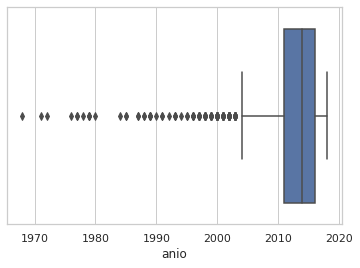

In [7]:
sns.set(style="whitegrid")
sns.boxplot(x=df['anio'])



> Podemos ver que la mayor parte de los casos de personas desaparecidas se han dado en los años más recientes dado que la distribución tiende a los malores más altos del conjunto de datos. También se puede ver que los datos atípicos se extienden a la izquierda de la gráfica.



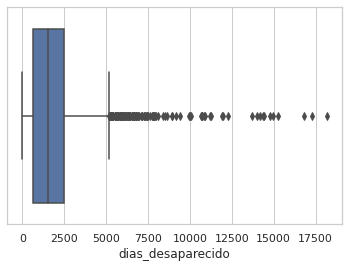

In [8]:
sns.set(style="whitegrid")
sns.boxplot(x=df['dias_desaparecido'])



> La distribución de los días que lleva la víctima desaparecida tiende a los valores pequeños del conjunto de datos. Los valores atípicos se extienden a la derecha del gráfico.



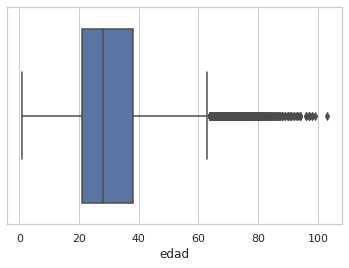

In [9]:
sns.set(style="whitegrid")
sns.boxplot(x=df['edad'])



> El 50% de los datos acerca de la edad registrada en el set de datos pertenece al rango de 20-40 años aproximadamente, teniendo una distribución que tiende a los valores pequeños del conjunto de datos. La distribución que se muestra para esta variable es más dispersa que las mostradas anteriormente.



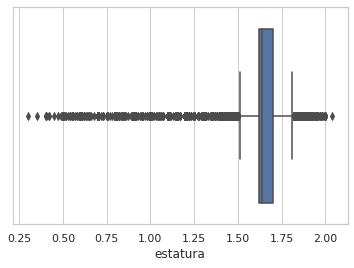

In [10]:
sns.set(style="whitegrid")
sns.boxplot(x=df['estatura'])



> La estatura es la variable que tiene más valores atípicos comparada con las anteriores. Tiene valores atípicos en ambos extremos de la cola. Los datos se concentran en los valores más altos del conjunto de datos.



A pesar de que nuestras variables numéricas tienen "valores atípicos", no serán filtrados del conjunto de datos. Los datos que están fuera del boxplot son casos registrados oficialmente como personas desaparecidas, por lo que bajo el contexto del set de datos sabemos que no son errores o valores anormales. 

#Tabla de Frecuencias

Para obtener más información de nuestras variables numéricas podemos desarrollar otro tipo de visualizaciones. La variable de año puede darnos más información acerca de los casos de personas desaparecidas en cierto rango de tiempo mediante una tabla de frecuencias.

Empezamos obteniendo el rango de nuestro conjunto de datos.


In [11]:
anios = df['anio']
anios.max() - anios.min()

50



> Dado que nuestro rango es muy pequeño, decidimos dividir en 10 segmentos.



Usando `cut` podemos segmentar nuestros datos.

In [12]:
pd.cut(anios, 10)

0        (2008.0, 2013.0]
1        (2003.0, 2008.0]
2        (2008.0, 2013.0]
3        (2003.0, 2008.0]
4        (2003.0, 2008.0]
               ...       
35896    (2013.0, 2018.0]
35897    (2013.0, 2018.0]
35898    (2013.0, 2018.0]
35899    (2013.0, 2018.0]
35900    (2013.0, 2018.0]
Name: anio, Length: 35901, dtype: category
Categories (10, interval[float64, right]): [(1967.95, 1973.0] < (1973.0, 1978.0] < (1978.0, 1983.0] <
                                            (1983.0, 1988.0] ... (1998.0, 2003.0] <
                                            (2003.0, 2008.0] < (2008.0, 2013.0] < (2013.0, 2018.0]]

La serie resultante la podemos agrupar y hacer el conteo de frecuencias.

In [13]:
segmentos = pd.cut(anios, 10)

df['anio'].groupby(segmentos).count()

anio
(1967.95, 1973.0]        3
(1973.0, 1978.0]         4
(1978.0, 1983.0]         4
(1983.0, 1988.0]         7
(1988.0, 1993.0]        11
(1993.0, 1998.0]        25
(1998.0, 2003.0]        73
(2003.0, 2008.0]      1568
(2008.0, 2013.0]     15567
(2013.0, 2018.0]     18639
Name: anio, dtype: int64



> Los casos de personas desaparecidas se concentran en los últimos 10 años de la lista (2008-2018), teniendo 15,567 casos del 2008-2013 y 18,639 casos del 2013-2018.



#Histograma

Las tres variables numéricas restantes pueden visualizarse en un histograma para obtener información más detallada de su distribución. Usando `Seaborn` podemos obtener el histograma de los días que lleva el caso abierto. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


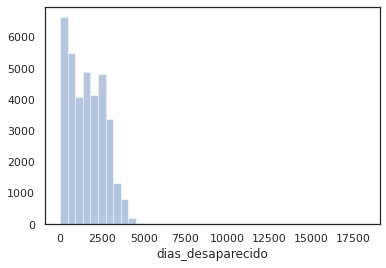

In [14]:
sns.set(style='white')
sns.distplot(df['dias_desaparecido'], kde=False, norm_hist=False, bins=40)



> Usando un binning de 40 para acentuar más la forma del histograma podemos ver que los datos tienen una asimetría positiva dado que la cola derecha es más larga que la izquierda. Dada la forma de los datos, es difícil inferir si es una distribución de cola corta o cola larga.



In [15]:
dias_des_valores=df.dias_desaparecido.values
print("kurtosis",kurtosis(dias_des_valores))
print("asimetria",skew(dias_des_valores))

kurtosis 9.10798077972732
asimetria 1.2970145907278083




> La asimetría de los datos `dias_desaparecido` es mayor a 0 y positiva, lo cual confirma la asimetría positiva que vimos en el histograma. La curtosis es positiva y mayor a cero, lo cual indica que la distribución está achatada y dispersa alrededor del punto medio. La distribución es de cola larga.



El histograma de la edad de las víctimas se muestra a continuación.

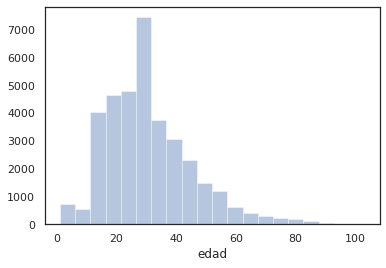

In [16]:
sns.distplot(df['edad'], kde=False, norm_hist=False, bins=20)



> Podemos ver que los datos tienen una ligera asimetría positiva dado que la cola derecha es más larga que la izquierda. De igual forma se puede ver que la distribución es de cola larga.



In [17]:
edades_valores=df.edad.values
print("kurtosis",kurtosis(edades_valores))
print("asimetria",skew(edades_valores))

kurtosis 1.5296287761320748
asimetria 1.0113409801553876




> La asimetría de los datos `edad` es mayor a 0 y positiva, lo cual confirma la asimetría positiva que vimos en el histograma. La curtosis es positiva y mayor a cero, lo cual confirma la distribución de cola larga vista en el histograma. Ambos valores son ligeramente mayores a 0, por lo que esta distribución se acerca a la normal más que la anterior.



Finalmente, el histograma de la estatura de las víctimas se muestra a continuación.

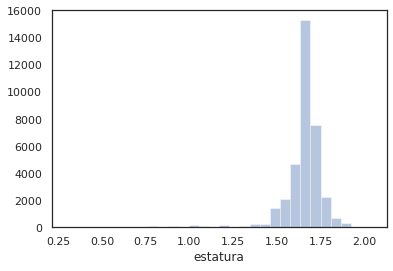

In [18]:
sns.distplot(df['estatura'], kde=False, norm_hist=False, bins=30)



> Podemos ver que los datos tienen una asimetría negativa dado que la cola izquierda es más larga que la derecha. De igual forma se puede ver que la distribución es de cola larga.



In [19]:
estatura_valores=df.estatura.values
print("kurtosis",kurtosis(estatura_valores))
print("asimetria",skew(estatura_valores))

kurtosis 21.791569364122182
asimetria -3.605588838799281




> La asimetría de los datos `estatura` es mayor a 0 y negativa, lo cual confirma la asimetría negativa que vimos en el histograma. La curtosis es positiva y mayor a cero, lo cual confirma la distribución de cola larga vista en el histograma.



#Gráfica de densidad

Para comparar distribuciónes en una misma gráfica, podemos hacer uso de los gráficos de densidad. Estos nos permiten graficar variables numéricas respecto de una variable categórico. Usando los datos de edad, estatura y sexo, podemos comparar las distribuciones de la edad y estaura según los datos de hombres y mujeres.

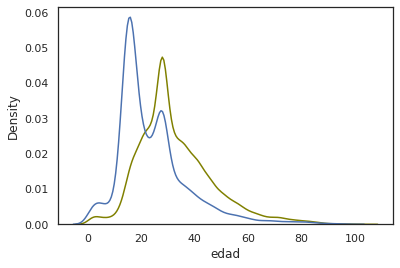

In [20]:
sns.kdeplot(data = df.query("sexo == 'Hombre'"), x = 'edad', color = 'olive')
sns.kdeplot(data = df.query("sexo == 'Mujer'"), x = 'edad')



> La línea color verde muestra la distribución de la edad para los hombres. Muestra un mayor conteo de casos en las edades de 20-40 años. La línea azul muestra la distribución de la edad para las mujeres. Sorprendentemente, la distribución actúa de manera casi bimodal, teniendo dos puntos altos antes y después de los 20 años.






El gráfico de densidad para la estatura de hombre sy mujeres se muestra a continuación.

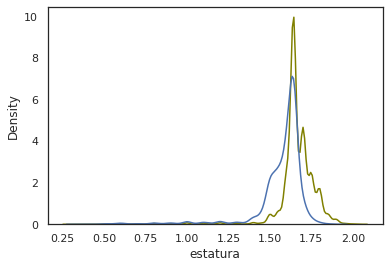

In [21]:
sns.kdeplot(data = df.query("sexo == 'Hombre'"), x = 'estatura', color = 'olive')
sns.kdeplot(data = df.query("sexo == 'Mujer'"), x = 'estatura')



> La línea verde muestra los datos de estatura para los hombres. Se puede ver que los datos se concentran alrededor del 1.60 m de estatura, teniendo otro pico a los 1.70 m. La línea azul muestra los datos de estatura para las mujeres, teniendo los datos concentrados alrededor de 1.60 m. 



#Scatterplot



Como parte de la visualización avanzada, podemos hacer uso del scatterplot para visualizar la relación entre dos variables numéricas segmentadas por una variable categórica. Usando la edad y estatura como variables numéricas, y el sexo como variable categórica, el resultado es el siguiente:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


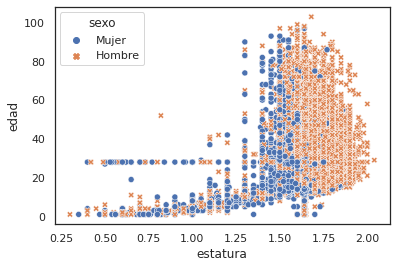

In [22]:
sns.scatterplot(df['estatura'], df['edad'], hue=df['sexo'],style=df['sexo']);



> Los datos mostrados se concentran más en las estaturas más altas tanto para hombres como para mujeres. No obstante, no parece muy evidente la concentración de datos en las edades.



#Binning Hexagonal

Dado que es un poco difícil de visualizar la relación entre edad y estatura con el scatterplot por la densidad de los puntos, podemos usar un binnning hexagonal para tener más información al respecto.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


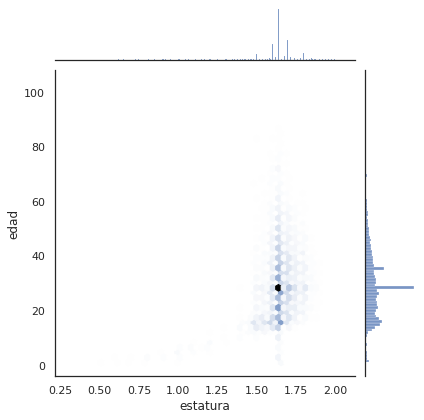

In [23]:
sns.jointplot('estatura', 'edad', data=df, kind='hex', ratio=5, joint_kws={'gridsize': 50});



> El binning hexagonal confirma las primeras características que vimos con el scatterplot. La estatura más común en los datos está alrededor del 1.60 m, no obstante también nos dice que la edad más común está alrededor de los 25 años. 



# Mapa

Ya que nuestro `DataFrame` contiene datos de las coordenadas en donde se vio por última vez a la persona, podemos desarrollar un mapa que señale la densidad de los casos a lo largo de la República Mexicana. Primero debemos obtener las coordenadas de latitud y longitud por separado.

In [24]:
df_coordenadas= df['coordenadas'].str.split(', ',expand=True)
df_coordenadas= df_coordenadas.rename(columns = {1:'longitud'})
df_coordenadas= df_coordenadas.rename(columns = {0:'latitud'})
df_coordenadas

,latitud,longitud
0,27.069053,-109.439423
1,19.16368,-100.134684
2,19.266337,-98.8978
3,19.547512,-99.193851
4,18.078,-91.6552
...,...,...
35896,19.051201,-98.212116
35897,19.25,-103.73333
35898,17.965896,-97.864616
35899,19.25,-103.73333




> Usando `str.split` en la columna de coordenadas, podemos separar los datos señalando la coma como el separador. Esto lo guardamos en un nuevo `DataFrame`.



Al obtener las coordenadas en diferentes columnas, debemos señalar que los datos contenidos son variables numéricas.

In [25]:
df_coordenadas= df_coordenadas[['longitud','latitud']].astype(float)


Ya que los datos son identificados de tipo `float`, podemos quitar aquellos datos que tengan una latitud y longitud de 0, dado que son valores que no poseen ningún valor en el gráfico que se realizará.

In [26]:
df_coordenadas= df_coordenadas.loc[~(df_coordenadas==0).all(axis=1)]


Usando `GeoPandas` y `shapely.geometry` podemos graficar los datos obtenidos como puntos en un gráfico de longitud vs. latitud.

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


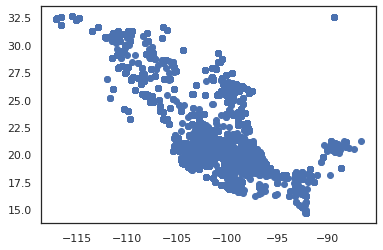

In [27]:
crs={'init':'epsg:4326'}
geometry=[Point(xy) for xy in zip(df_coordenadas['longitud'], df_coordenadas['latitud'])]
geodata=gpd.GeoDataFrame(df_coordenadas,crs=crs, geometry=geometry)
geodata.plot()



> Podemos ver que sin una imagen de referencia, el gráfico toma la forma de la República Méxicana.



Para tener mejor claridad de en qué estados sucedieron los casos, importamos un archivo tipo `.shp` que será útil para graficar los puntos encima de la imágen de referencia.

In [28]:
mexico_shapefile = gpd.read_file('/vsicurl/https://github.com/MinervaNunez/Proyecto-_Fase3_Python/raw/main/Mexico_States.shp')

Text(25.125, 0.5, 'Latitud')

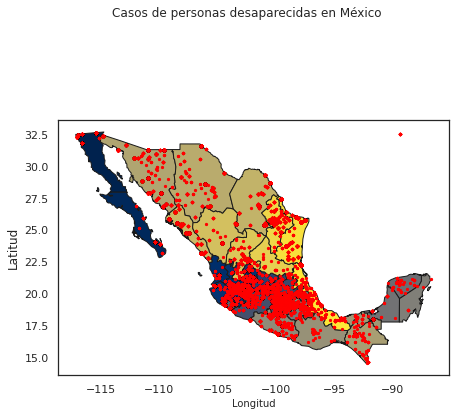

In [29]:
fig, ax = plt.subplots(figsize=(7,7))

mexico_shapefile.plot(ax=ax, facecolor='Grey', edgecolor='k',alpha=1,linewidth=1,cmap="cividis")


geodata.plot(ax=ax, color='red', markersize=5);



fig.suptitle('Casos de personas desaparecidas en México', fontsize=12)
ax.set_xlabel('Longitud', fontsize=10)
ax.set_ylabel('Latitud', fontsize='medium')



> Podemos ver que muchos de los casos suceden al centro y noreste del país.

